In [1]:
from google.colab import drive
drive.mount('/content/drive')
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import torch

# LightAutoML presets, task and report generation
##from lightautoml.automl.presets.tabular_presets import TabularAutoML
##from lightautoml.tasks import Task

df = pd.read_csv('/content/drive/MyDrive/Pochta/train_dataset_train.csv')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


def rem_br(x):
    l_b = x.find('(')
    r_b = x.find(')')
    while l_b != -1:
        if len(x) -1 != r_b:
            if l_b == -1:
                continue
            elif r_b == -1:
                x = x[:l_b]
            elif l_b>r_b:
                x = x[:r_b]+x[r_b+1:]
            elif r_b != -1 and l_b < r_b:
                x = x[:l_b] + x[r_b+1:]

        else:
            x = x[:l_b]
        l_b = x.find('(')
        r_b = x.find(')')
    return x

def rem_br2(x):
    l_b = x.find('[')
    r_b = x.find(']')
    while l_b != -1:
        if len(x) -1 != r_b:
            if r_b != -1:
                x = x[:l_b] + x[r_b+1:]
            else:
                x = x[:l_b]
        else:
            x = x[:l_b]
        l_b = x.find('[')
        r_b = x.find(']')
    return x
#from nltk.stem import WordNetLemmatizer

#lemmatizer = WordNetLemmatizer()
#def lemmatize_words(text):
#    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def text_preproc(x):
    x = x.lower()
    x = rem_br(x)
    x = rem_br2(x)

    for i in range(len(x)):
        if x[i] == ',':
            x = x[:i] + ' ' + x[i+1:]
    x = remove_punctuation(x)
    return x



In [4]:
cols = ['id']
for i in range(100):
    cols.append(f'col{i}')

big_vect  = pd.DataFrame(columns = cols)

for i in range(50,60):
    ptr = pd.read_csv(f'/content/drive/MyDrive/Pochta/vect{59999+i*60000}.csv').drop(['Unnamed: 0'],axis = 1)
    big_vect = pd.concat([big_vect,ptr])


In [ ]:
#big_vect['id'] = df['id'].values

In [6]:
big_vect.drop(['id'],axis = 1,inplace = True)

In [7]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA')

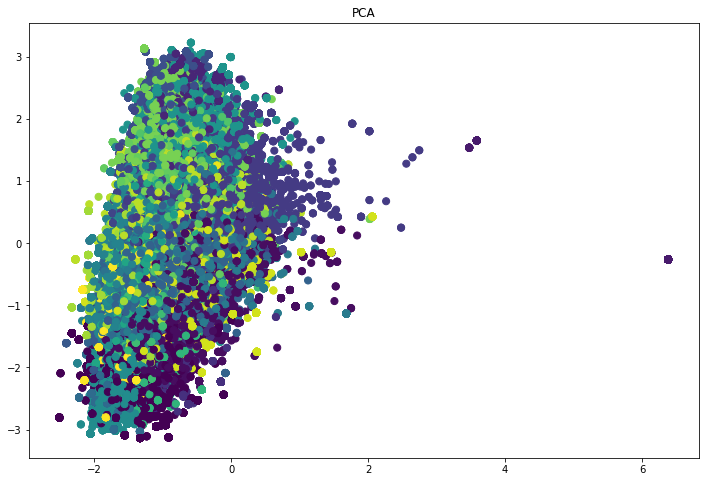

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=30, random_state=1)
numeric_cols = big_vect
kmeans.fit(numeric_cols)


# Визуализация при помощи метода главных компонент
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Pochta/train_dataset_train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
id_col = df['id'].values
del df

In [13]:
kmeans.predict(big_vect[:10])

array([12,  2,  9, 14,  2, 26,  2,  2, 21,  2], dtype=int32)

In [14]:
id_clust = pd.DataFrame(columns = ['id','cluster'])
for i in range(100):
    ptr = pd.read_csv(f'/content/drive/MyDrive/Pochta/vect{59999+i*60000}.csv').drop(['Unnamed: 0','id'],axis = 1)
    preds = kmeans.predict(ptr)
    ptr_df = pd.DataFrame(columns = ['id','cluster'])
    ptr_df['id'] = id_col[i*60000:(i+1)*60000]
    ptr_df['cluster'] = preds

    id_clust = pd.concat([id_clust,ptr_df],ignore_index=True)



In [17]:
id_clust['cluster'].to_csv('train_clusters.csv')

In [21]:
import pickle
pickle.dump(kmeans, open("save_kmeans.pkl", "wb"))